In [2]:
%matplotlib inline
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = (20.0,10.0)
#reading data

data= pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [15]:
#collecting x and y values:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [19]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
 #total no of values
n = len(X)
# calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)
# here b1 is the mean value
# b0 is the C value ; C = Y - MX
# So for equation Y= MX+C ; We have calculated M and C values
# Brain weight = b1
# Head Size = b0
print(b1,b0)

0.26342933948939945 325.57342104944223


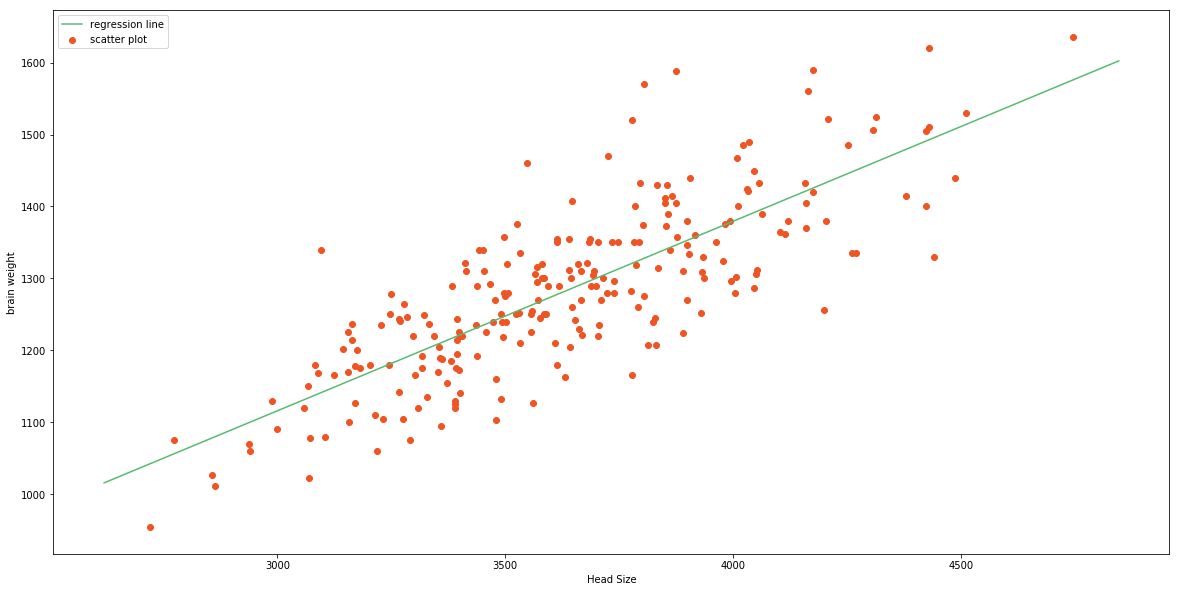

In [20]:
# Plotting and Regression Line:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x,1000)
y = b0 + b1 * x
#Plotting Line
plt.plot(x,y,color ='#58b970' , label = 'regression line')
#plotting scatter line
plt.scatter(X,Y,c='#ef5423' , label = 'scatter plot')

plt.xlabel('Head Size')
plt.ylabel('brain weight')
plt.legend()
plt.show()

In [23]:
ss_t = 0 #total sum of square
ss_r = 0 #total sum of squares of residuals
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

0.639311719957
